# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Joynn Lin]  
**Dataset:** [Online Shoppers Intention]  
**Date:** [October 8, 2025]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---

## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [82]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [83]:
# Load your dataset here
df = pd.read_csv('online_shoppers_intention.csv')

# Create a simple example dataset
np.random.seed(42)
n = 200

# Create sample data (replace with your actual dataset)
data = {
    'Revenue': np.random.choice(['True', 'False'], n, p=[0.2, 0.8]), # 20 bought something, 80 did not
    'ProductRelated_Duration': np.random.normal(500, 100, n), # time spent on product-related pages
    'VisitorType': np.random.choice(['Returning_Visitor', 'New_Visitor'], n), # visitor type
    'BounceRates': np.random.normal(200, 1, n) # bounce rates for each session that visitors visited without triggering any single request before leaving the site
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head(100)


Dataset shape: (200, 4)


,Revenue,ProductRelated_Duration,VisitorType,BounceRates
0,False,431.997528,Returning_Visitor,202.060748
1,False,523.225370,New_Visitor,201.755341
2,False,529.307247,New_Visitor,199.751036
3,False,428.564858,Returning_Visitor,200.971571
4,True,686.577451,Returning_Visitor,200.645376
...,...,...,...,...
95,False,434.667077,Returning_Visitor,200.755391
96,False,676.545424,New_Visitor,200.500917
97,False,540.498171,Returning_Visitor,199.022445
98,True,373.911605,Returning_Visitor,200.099332


---

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [84]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (200, 4)

Data types:
Revenue                     object
ProductRelated_Duration    float64
VisitorType                 object
BounceRates                float64
dtype: object

Missing values:
Revenue                    0
ProductRelated_Duration    0
VisitorType                0
BounceRates                0
dtype: int64

Basic statistics:


,ProductRelated_Duration,BounceRates
count,200.000000,200.000000
mean,506.741427,199.947513
std,96.904532,1.018008
min,175.873266,197.528355
25%,433.436972,199.206122
50%,508.943505,199.944434
75%,566.649744,200.618820
max,885.273149,203.078881


**---Target variable analysis---**
    
Sample Analysis: The statistical analysis suggests that in our sample data, the number of shoppers who did make a purchase is 64, and the number of shoppers who did not is 154. Revenue is a binary variable.

In [85]:
print("=== TARGET VARIABLE ===")                # Assuming 'Revenue' is the target variable
target_counts = df['Revenue'].value_counts()    # Count the number of occurrences of each unique value in the 'Revenue' column 
print(f"Target distribution:")                  # print distribution 
print(target_counts)                            # print count 


=== TARGET VARIABLE ===
Target distribution:
Revenue
False    154
True      46
Name: count, dtype: int64


**---Visualize Target Variable---**

Visualization Summary: The bar chart indicates the number of counts in each categories of our target variable (Revenue), and compares the distribution of the counts. Based on the bar chart, we can see that most shoppers do not make a purchase for whatever condition that we will examine further in this assignment. The pie chart indicates the percentage of the distribution. 

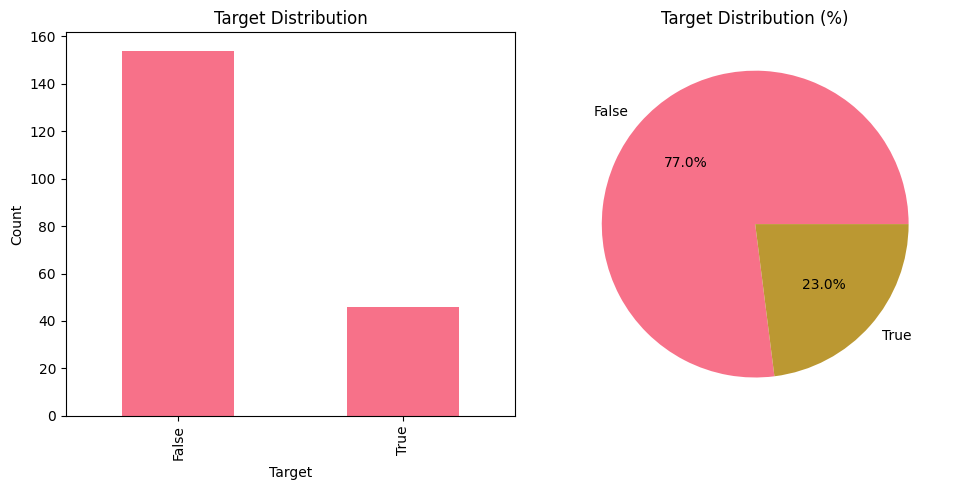

In [102]:
plt.figure(figsize=(10, 5))                     # create a figure with a 10 by 5 ratio 

plt.subplot(1, 2, 1)                            # create a subplot with 1 row, 2 columns, and select the first subplot 
target_counts.plot(kind='bar')                  # plot the target counts as a bar chart
plt.title('Target Distribution')                # create the title of the plot
plt.xlabel('Target')                            # create the x-axis label
plt.ylabel('Count')                             # create the y-axis label

plt.subplot(1, 2, 2)                            # create a subplot with 1 row, 2 columns, and select the second subplot
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')  # plot the target counts as a pie chart
plt.title('Target Distribution (%)')            # create the title of the plot

plt.tight_layout()                              # Automatically adjust subplot spacing
plt.show()                                      # display the plot

**Numerical variables analysis**

The statistical analysis suggests that in our sample data, the numerical variables are 'ProductRelated_Duration' and 'BounceRates" 

In [103]:
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")


=== NUMERICAL VARIABLES ===
Numerical columns: ['ProductRelated_Duration', 'BounceRates']


**Visualization of Numerical Variables Distribution**

The bar chart indicates the number of counts distribution in each of the numerical variables. 

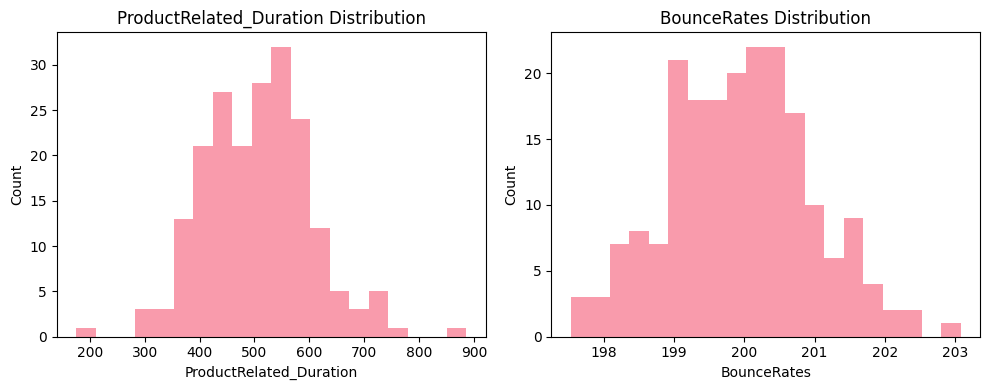

In [88]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Categorical Variable Analysis**

The statistical analysis suggests that in our sample data, our categorical variable is 'VisitorType'. 

In [112]:
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

=== CATEGORICAL VARIABLES ===
Categorical columns: ['VisitorType']


**Visualize Categorical Variable Distribution**

The bar chart indicates the number of counts distribution in the 'VisitorTypes' variable. 

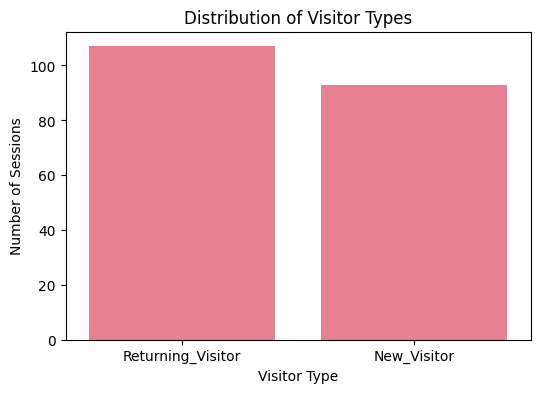

In [113]:
plt.figure(figsize=(6,4))
sns.countplot(x='VisitorType', data=df)

plt.title('Distribution of Visitor Types')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.show()


**Correlation Analysis between Numerical Variable**

The heatmap suggests a very weak positive relationship between the two numerical variables (r = 0.065181). This relationship indicates that the amount of time a shopper spends on product-related pages has almost no linear association with the likelihood of leaving the site immediately. However, we will further justify this such statement in hypothesis 3. 

=== CORRELATION ANALYSIS ===


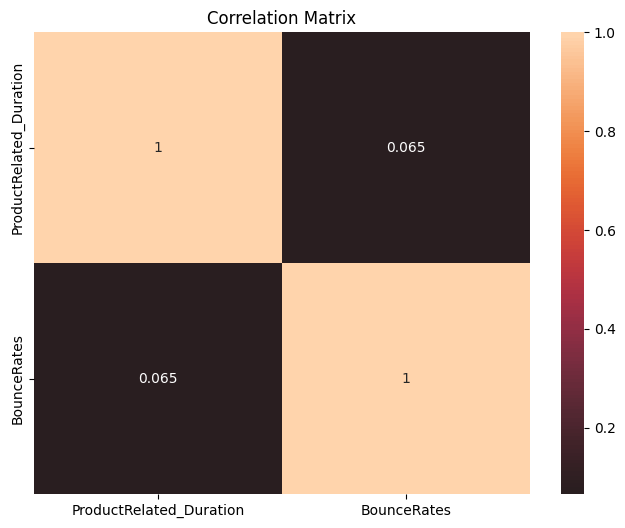


Correlations with ProductRelated_Duration variable:
ProductRelated_Duration    1.000000
BounceRates                0.065181
Name: ProductRelated_Duration, dtype: float64


In [122]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,  center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with ProductRelated_Duration variable
if 'ProductRelated_Duration' in df.columns:
    product_related_duration_correlations = correlation_matrix['ProductRelated_Duration'].sort_values(ascending=False)
    print("\nCorrelations with ProductRelated_Duration variable:")
    print(product_related_duration_correlations)


**Visualizing the relationship between ProductRelated_Duration and Purchase Decision**

The barchart indicates the relationship between ProductRelated_Duration and Purchase Decision. From looking at the bar chart now, we can see that on average, 

/var/folders/pn/l9gm14gx4fj5jtrtw8xmm5tm0000gn/T/ipykernel_86385/2048554317.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration = df.groupby('Revenue')['ProductRelated_Duration'].mean()


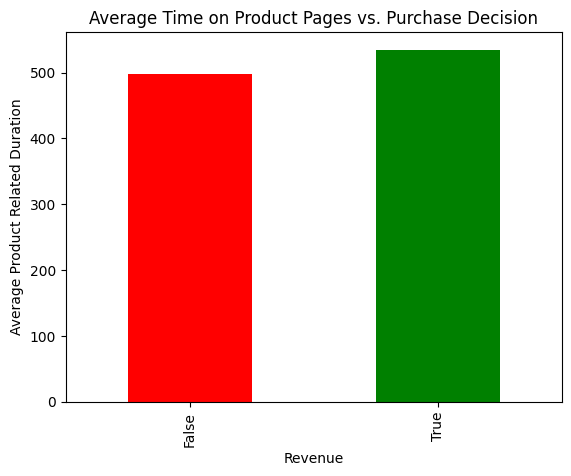

In [120]:
# Bar Chart indicating average time spent on product-related pages for visitors who made a purchase vs. those who did not 
avg_duration = df.groupby('Revenue')['ProductRelated_Duration'].mean()
avg_duration.plot(kind='bar', color=['red','green'])
plt.ylabel('Average Product Related Duration')
plt.title('Average Time on Product Pages vs. Purchase Decision')
plt.show()

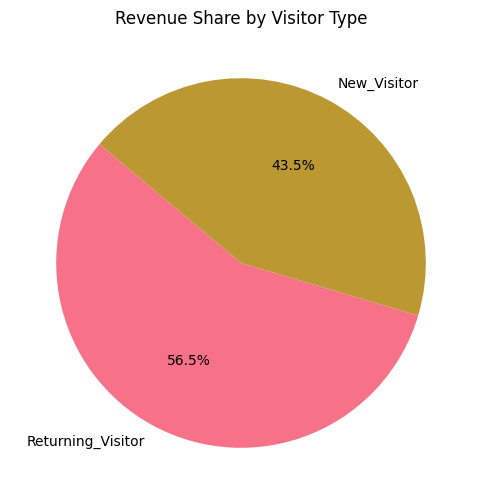

In [121]:
# Pie Chart of Revenue Share by Visitor Type
visitor_revenue = df[df['Revenue'] == 'True']['VisitorType'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(visitor_revenue, labels=visitor_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Visitor Type')
plt.show()

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Returning visitors are more likely to make a purchase than new visitors. 
**H1:** Returning visitors are more likely to make a purchase than new visitors. 
- **Null Hypothesis (H0):** Returning visitors and new visitors are equally likely to make a purchase.
- **Alternative Hypothesis (H1):** Returning visitors are more likely to make a purchase than new visitors.  
- **Rationale:** Based on the EDA, I see that there is a significant difference in the pie chart for shared revenue between visitor types. Additionally, visitors who return likely have more shopping information and experience with the product than new visitors, which would make them inclince to make a purchase. By testing the relationship between VisitorTypes and Revenue, we can test to see if whether visitor types can significantly influence purchase behaviors based on revenue. 

### Hypothesis 2: Shoppers who spent more time on product related page are more likely to make a purchase.  
**H2:** Shoppers who spent more time on product related page are more likely to make a purchase.  
- **Null Hypothesis (H0):** The average time spent on product related page is the same for shoppers who made a purchase and who did not. 
- **Alternative Hypothesis (H1):** Shoppers who make a purchase spend more time on product-related pages than those who do not. 
- **Rationale:** The amount of time shoppers spent on reviewing a product related page is likely correlated with their interest in purchasing the product. A longer duration meant a higher intention of purchasing the product, and a shorter duration means a lower interest of purchasing the product. By testing the correlation between ProductRelated_Duration and Revenue, we can test to see if time spent on product related page can have a significant effect on purchasing behaviors based on revenue. 

### Hypothesis 3: Shoppers who spent more time on product related page are less likely to leave the website immediately. 
**H3:** Shoppers who spent more time on product related page are less likely to leave the website immediately. 
- **Null Hypothesis (H0):** There is no signficiant relationship between ProductRelated_Duration and BounceRates. 
- **Alternative Hypothesis (H1):** There is a significant relationship between ProductRelated_Duration and BounceRates. 
- **Rationale:** A higher ProductRelated_Duration represents that the shopper is engaged with the content of the product and are less likely to leave immediately without looking further into product details and browsing similar product options. By testing the relationship between ProductRelated_Duration and BounceRates, we can test to see if increased product engagement reduces the likelihood for shoppers to exit immediately (lower BounceRate). 

---

## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Returning visitors are more likely to make a purchase than new visitors. 

**Test Choice:** [Chi-Square]
- **Why appropriate:** Since we're determining the relationship two categorical data, a Chi-Square test is most appropriate for such comparison.


In [95]:
# ---Hypothesis 1 Testing---
print("=== TESTING HYPOTHESIS 1 ===")

# ---Data Preparation---
# Contingency table for Chi-square test (input for Chi-square test)
contingency = pd.crosstab(df['VisitorType'], df['Revenue']) # Create a contingency table to show the counts of how many visitors fall into each category of visitor type and revenue
print(contingency) 

# ---Chi-square test---- 
chi2, p, dof, expected = stats.chi2_contingency(contingency) # Perform Chi-square test on the contingency table to see if there is a significant association between visitor type and revenue
print(f"\nChi2 Statistic: {chi2:.2f}") # print Chi2 statistic
print(f"p-value: {p:.4f}") # print p-value

if p < 0.05:
    print("Reject H0: There is a significant difference")
else:   
    print("Fail to reject H0: No significant difference")


=== TESTING HYPOTHESIS 1 ===
Revenue            False  True
VisitorType                   
New_Visitor           73    20
Returning_Visitor     81    26

Chi2 Statistic: 0.09
p-value: 0.7643
Fail to reject H0: No significant difference


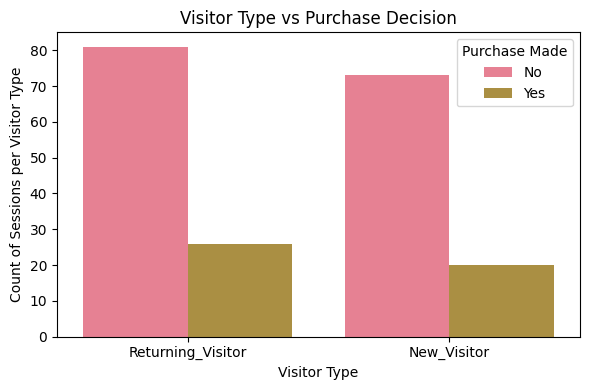

In [96]:
# Visualization of Visitor Type vs Purchase Decision
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='VisitorType', hue='Revenue')

plt.title('Visitor Type vs Purchase Decision')
plt.xlabel('Visitor Type')
plt.ylabel('Count of Sessions per Visitor Type') 
plt.legend(title='Purchase Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


**Visualization Summary:**
The bar chart shows no significant difference in purchase behavior between new and returning visitors since the height of the bars for both visitor types are similar.

**Statistical Summary:**
In our Chi-Square test, the p-value that we obtained is greater than 0.05, so we failed to reject null. Therefore, our hypothesis is proven wrong.

### Testing Hypothesis 2: Shoppers who spent more time on product related page are more likely to make a purchase. 

**Test Choice:** [Independent Sample t-test]
- **Why appropriate:** [Since we're comparing the mean of ProductRelated_Page to two independent groups of purchase behaviors, it is appropriate to use the independent sample t-test.] 

In [97]:
# ---Hypothesis 2 Testing---
print("=== TESTING HYPOTHESIS 2 ===")
group1 = df[df['Revenue'] == 'False']['ProductRelated_Duration']
group2 = df[df['Revenue'] == 'True']['ProductRelated_Duration']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: Shoppers who make a purchase spend more time on product-related pages than those who do not.")
else:
    print("Fail to reject H0: The average time spent on product related page is the same for shoppers who made a purchase and who did not.")
#--- summary ---
# Based on the t-test, the p-value is less than 0.05, indicating shoppers who make a purchase spend significantly more time on product-related pages than those who do not.


=== TESTING HYPOTHESIS 2 ===
t-statistic: -2.2328
p-value: 0.0267
Reject H0: Shoppers who make a purchase spend more time on product-related pages than those who do not.


/var/folders/pn/l9gm14gx4fj5jtrtw8xmm5tm0000gn/T/ipykernel_86385/1235720114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Revenue', y='ProductRelated_Duration', data=df,


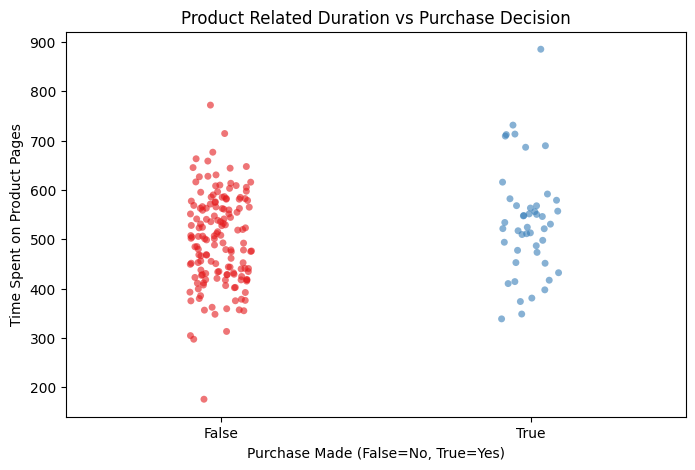

In [98]:
# Visualization of Product Related Duration vs Purchase Decision
plt.figure(figsize=(8,5))
sns.stripplot(x='Revenue', y='ProductRelated_Duration', data=df, 
              jitter=True, palette='Set1', alpha=0.6)
plt.title('Product Related Duration vs Purchase Decision')
plt.xlabel('Purchase Made (False=No, True=Yes)')        
plt.ylabel('Time Spent on Product Pages')
plt.show()

**Visualization Summary:**
The stripplot shows that those who spent a higher amount of time on product related pages often will make a purchase.

**Statistical Summary:**
In our Independent Sample t-test, the p-value that we obtained is smaller than 0.05, so we reject null. Therefore, our hypothesis is proven right.

### Testing Hypothesis 3: Shoppers who spent more time on product related page are less likely to leave the website immediately. 

**Test Choice:** [Pearson Correlation Test]
- **Why appropriate:** [Since we're trying to measure the linear correlation between the two variables, I then looked up appropriate statistical test for comparing two continuous numerical variables. By doing this test, we can obtain the coefficient to determine the strength of the relationship and the direction.]


In [99]:
# --- Hypothesis 3 Testing: Pearson Correlation ---
print("=== TESTING HYPOTHESIS 3 (Pearson) ===")

corr, p_value = stats.pearsonr(df['ProductRelated_Duration'], df['BounceRates'])

print(f"Correlation coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is no significant relationship between ProductRelated_Duration and BounceRates.")
else:
    print("Fail to reject H0: No significant difference.")

=== TESTING HYPOTHESIS 3 (Pearson) ===
Correlation coefficient: 0.0652
p-value: 0.3591
Fail to reject H0: No significant difference.


In [100]:
# --- Hypothesis 3 Testing: Pearson Correlation ---
print("=== TESTING HYPOTHESIS 3 (Pearson) ===")

corr, p_value = stats.pearsonr(df['ProductRelated_Duration'], df['BounceRates'])

print(f"Correlation coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is no significant relationship between ProductRelated_Duration and BounceRates.")
else:
    print("Fail to reject H0: No significant difference.")

=== TESTING HYPOTHESIS 3 (Pearson) ===
Correlation coefficient: 0.0652
p-value: 0.3591
Fail to reject H0: No significant difference.


**Visualization Summary:**
The linear regression plot shows no significant difference in purchase behavior between new and returning visitors since the height of the bars for both visitor types are similar.

**Statistical Summary:**
In our Chi-Square test, the p-value that we obtained is greater than 0.05, so we failed to reject null. Therefore, our hypothesis is proven wrong.

## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis]
2. [Describe patterns you identified]
3. [Note any interesting relationships]

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Chi-Square] | [0.7643] | [Not] | [In the sample data, both returning and new visitors are equally likely to make a purchase] |
| **H2** | [Independent Sample t-test] | [0.0267] | [Significant/Not] | [In the sample data, shoppers who make a purchase spend more time on product-related pages than those who do not.] |
| **H3** | [Pearson Correlation Test] | [0.3591] | [Not] | [In the sample data, There is no significant relationship between ProductRelated_Duration and BounceRates.] |

### Key Insights:
- [What do your results tell you about the data?]
- [What are the practical implications?]
- [What limitations should be considered?]

### Future Research:
- [What additional analysis could be done?]
- [What other variables might be important?]


## 6.Citations
- Which statistic test to use: https://www.spss-tutorials.com/which-statistical-test-should-i-use/
- AI assistant in making visualizations (ChatGPT, Copilot)
- How to perform a Pearson Correlation Coefficient Test: https://www.statology.org/t-test-for-correlation/
- AI help with code for Point-Biserial Correlation
- Assignment5 template


---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.